# Import Required Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN



# setting to make numbers easier to read on display
pd.options.display.float_format='{:20.2f}'.format

#show all columns on output 
pd.set_option('display.max_columns', 999)

# Data Exploration

In [2]:
df = pd.read_csv("./data/Online Retail - Online Retail.csv")

### Print first 5 Rows

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate            UnitPrice           CustomerID         Country  
0  12/1/10 8:26                 2.55             17850.00  United Kingdom  
1  12/1/10 8:26                 3.39             17850.00  United Kingdom  
2  12/1/10 8:26                 2.75             17850.00  United Kingdom  
3  12/1/10 8:26                 3.39             17850.00  United Kingdom  
4  12/1/10 8:26                 3.39             17850.00  United Kingdom

## Check the summery of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


from the above the customer id has so many missing values.and the invoiceDate is already in datetime

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Statistical information for numerical values

In [6]:
df.describe()

Quantity            UnitPrice           CustomerID
count            541909.00            541909.00            406829.00
mean                  9.55                 4.61             15287.69
std                 218.08                96.76              1713.60
min              -80995.00            -11062.06             12346.00
25%                   1.00                 1.25             13953.00
50%                   3.00                 2.08             15152.00
75%                  10.00                 4.13             16791.00
max               80995.00             38970.00             18287.00

In this dataset, the Quantity and UnitPrice columns contain some negative values. Since quantity cannot be negative in real-life scenarios, I will keep only the rows with positive quantity values. I will also remove rows with negative values in the UnitPrice column.

### Check for categorical variables

In [7]:
df.describe(include="O")

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

           InvoiceDate         Country  
count           541909          541909  
unique           23260              38  
top     10/31/11 14:41  United Kingdom  
freq              1114          495478

### Check missing customers

In [8]:
df[df["CustomerID"].isna()].head(10)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

        InvoiceDate            UnitPrice  CustomerID         Country  
622   12/1/10 11:52                 0.00         NaN  United Kingdom  
1443  12/1/10 14:32                 2.51         NaN  United Kingdom  
1444  12/1/10 14:32                 2.51         NaN  United Kingdom  
1445  12/1/10 14:32                 0.85         NaN  United Kingdom  
1446  12/1/10 14:32                 1.66         NaN  United Kingdom  
1447  12/1/10 14:32                 1.66         NaN  United Kingdom  
1448  12/1/10 14:32                 2.51         NaN  United Kingdom  
1449  12/1/10 14:32                 0.43         NaN  United Kingdom  
1450  12/1/10 14:32                 0.43         NaN  United Kingdom  
1451  12/1/10 14:32                 0.43         NaN  United Kingdom

## Check Negative quantity

In [9]:
df[df["Quantity"]<0].head(10)

InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   
939   C536506     22960           JAM MAKING SET WITH JARS        -6   

       InvoiceDate            UnitPrice           CustomerID         Country  
141   12/1/10 9:41                27.50             14527.00  United Kingdom  
154   12/1/10 9:49                 4.65             15311.00  United Kingdom  
235  12/1/10 10:24                 1.65             17548.00  United Kingdom  
236  12/1/10 10:24                 0.29             17548.00  United Kingdom  
237  12/1/10 10:24                 0.29             17548.00  United Kingdom  
238  12/1/10 10:24                 0.29             17548.00  United Kingdom  
239  12/1/10 10:24                 3.45             17548.00  United Kingdom  
240  12/1/10 10:24                 1.65             17548.00  United Kingdom  
241  12/1/10 10:24                 1.65             17548.00  United Kingdom  
939  12/1/10 12:38                 4.25             17897.00  United Kingdom

## check invoice (6 digit og code is invoice here 7 digit)with 6 digit


In [10]:
df["InvoiceNo"]=df["InvoiceNo"].astype("str")
df[df["InvoiceNo"].str.match("^\\d{6}$")==False]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate            UnitPrice           CustomerID  \
141      12/1/10 9:41                27.50             14527.00   
154      12/1/10 9:49                 4.65             15311.00   
235     12/1/10 10:24                 1.65             17548.00   
236     12/1/10 10:24                 0.29             17548.00   
237     12/1/10 10:24                 0.29             17548.00   
...               ...                  ...                  ...   
540449   12/9/11 9:57                 0.83             14397.00   
541541  12/9/11 10:28               224.69             15498.00   
541715  12/9/11 11:57                10.95             15311.00   
541716  12/9/11 11:58                 1.25             17315.00   
541717  12/9/11 11:58                 1.25             17315.00   

               Country  
141     United Kingdom  
154     United Kingdom  
235     United Kingdom  
236     United Kingdom  
237     United Kingdom  
...                ...  
540449  United Kingdom  
541541  United Kingdom  
541715  United Kingdom  
541716  United Kingdom  
541717  United Kingdom  

[9291 rows x 8 columns]

### Check the length of above 6 digit invoices


In [11]:
len(df[df["InvoiceNo"].str.match("^\\d{6}$")==False])

9291

### if check unique values its so many numerical invoices so i convert numerical invoices to empty spaces("[0-9]"to" ")

In [12]:
df["InvoiceNo"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

## Check the invoices are startswith A

In [13]:
df[df["InvoiceNo"].str.startswith("A")]

InvoiceNo StockCode      Description  Quantity    InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  8/12/11 14:50   
299983   A563186         B  Adjust bad debt         1  8/12/11 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/11 14:52   

                  UnitPrice  CustomerID         Country  
299982             11062.06         NaN  United Kingdom  
299983            -11062.06         NaN  United Kingdom  
299984            -11062.06         NaN  United Kingdom

here the information is not required so i clean this above data during cleaning process



## check values in stockcode

here also 5 digit code is stockcode check whether string is include this or not



In [14]:
df["StockCode"]=df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$")==False]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
45        536370      POST                              POSTAGE         3   
...          ...       ...                                  ...       ...   
541778    581578    84997C      CHILDRENS CUTLERY POLKADOT BLUE         8   
541809    581579    85099C       JUMBO  BAG BAROQUE BLACK WHITE        10   
541838    581580    84993A            75 GREEN PETIT FOUR CASES         2   
541844    581580    85049A        TRADITIONAL CHRISTMAS RIBBONS         1   
541853    581580    85049E            SCANDINAVIAN REDS RIBBONS         2   

          InvoiceDate            UnitPrice           CustomerID  \
0        12/1/10 8:26                 2.55             17850.00   
2        12/1/10 8:26                 2.75             17850.00   
3        12/1/10 8:26                 3.39             17850.00   
4        12/1/10 8:26                 3.39             17850.00   
45       12/1/10 8:45                18.00             12583.00   
...               ...                  ...                  ...   
541778  12/9/11 12:16                 4.15             12713.00   
541809  12/9/11 12:19                 1.79             17581.00   
541838  12/9/11 12:20                 0.42             12748.00   
541844  12/9/11 12:20                 1.25             12748.00   
541853  12/9/11 12:20                 1.25             12748.00   

               Country  
0       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
45              France  
...                ...  
541778         Germany  
541809  United Kingdom  
541838  United Kingdom  
541844  United Kingdom  
541853  United Kingdom  

[54873 rows x 8 columns]

### print the unique values

In [15]:
df["StockCode"]=df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

1. ```df["StockCode"].str.match("^\\d{5}$")```
   * ```^``` → Start of the string.
   * ```\d{5}``` → Exactly 5 digits (```\d``` means digit, ```{5}``` means ```5``` times).
   * ```$``` → End of the string.
   * This matches StockCodes that are exactly 5 digits long (e.g., ```"12345"```).
   * ```== False``` means we exclude these.
2. ```df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")```
   * ```^``` → Start of the string.
   * ```\d{5}``` → First 5 characters must be digits.
   * ```[a-zA-Z]+``` → Followed by at least one letter (uppercase or lowercase).
   * ```$``` → End of the string.
   * Matches StockCodes like ```"12345A"```, ```"67890XYZ"```, etc.
   * ```== False``` means we exclude these as well.
3. Combining the conditions with ```&``` (AND)
   * We select rows where ```StockCode``` does not match either pattern.
   * This filters out all values that are not:
          * Exactly 5 digits (e.g., ```"12345"```)
          * 5 digits followed by letters (e.g., ```"12345ABC"```)

In [16]:
len(df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)])

2995

### check individual of above

In [17]:
df[df["StockCode"].str.contains("^POST")]

InvoiceNo StockCode Description  Quantity    InvoiceDate  \
45        536370      POST     POSTAGE         3   12/1/10 8:45   
386       536403      POST     POSTAGE         1  12/1/10 11:27   
1123      536527      POST     POSTAGE         1  12/1/10 13:04   
5073      536840      POST     POSTAGE         1  12/2/10 18:27   
5258      536852      POST     POSTAGE         1   12/3/10 9:51   
...          ...       ...         ...       ...            ...   
541198    581493      POST     POSTAGE         1  12/9/11 10:10   
541216    581494      POST     POSTAGE         2  12/9/11 10:13   
541730    581570      POST     POSTAGE         1  12/9/11 11:59   
541767    581574      POST     POSTAGE         2  12/9/11 12:09   
541768    581578      POST     POSTAGE         3  12/9/11 12:16   

                  UnitPrice           CustomerID      Country  
45                    18.00             12583.00       France  
386                   15.00             12791.00  Netherlands  
1123                  18.00             12662.00      Germany  
5073                  18.00             12738.00      Germany  
5258                  18.00             12686.00       France  
...                     ...                  ...          ...  
541198                15.00             12423.00      Belgium  
541216                18.00             12518.00      Germany  
541730                18.00             12662.00      Germany  
541767                18.00             12526.00      Germany  
541768                18.00             12713.00      Germany  

[1256 rows x 8 columns]

| StockCode      | Include/Exclude | Reason                                     |
|----------------|------------------|--------------------------------------------|
| POST           | Exclude          | Postage charge, not a product              |
| D              | Exclude          | Discount                                   |
| C2             | Exclude          | Possibly a discount or adjustment code     |
| DOT            | Exclude          | Not a product, internal use                |
| M              | Exclude          | Manual adjustments                         |
| BANK CHARGES   | Exclude          | Bank fee, not a product                    |
| S              | Exclude          | Sample or special case                     |
| AMAZONFEE      | Exclude          | Amazon platform fee                        |
| DCGS0076       | Include          | Actual product                             |
| DCGS0003       | Include          | Actual product                             |
| gift_0001_40   | Include          | Gift product                               |
| DCGS0070       | Include          | Actual product                             |
| m              | Exclude          | Possibly manual entry error                |
| gift_0001_50   | Include          | Gift product                               |
| gift_0001_30   | Include          | Gift product                               |
| gift_0001_20   | Include          | Gift product                               |
| DCGS0055       | Include          | Actual product                             |
| DCGS0072       | Include          | Actual product                             |
| DCGS0074       | Include          | Actual product                             |
| DCGS0069       | Include          | Actual product                             |
| DCGS0057       | Include          | Actual product                             |
| DCGSSBOY       | Include          | Actual product (Boy gift set)              |
| DCGSSGIRL      | Include          | Actual product (Girl gift set)             |
| gift_0001_10   | Include          | Gift product                               |
| PADS           | Include          | Actual product                             |
| DCGS0004       | Include          | Actual product                             |
| DCGS0073       | Include          | Actual product                             |
| DCGS0071       | Include          | Actual product                             |
| DCGS0068       | Include          | Actual product                             |
| DCGS0067       | Include          | Actual product                             |
| DCGS0066P      | Include          | Actual product                             |
| B              | Exclude          | Possibly bulk/manual entry or adjustment   |
| CRUK           | Exclude          | Charity donation, not a sellable product   |


# Data Cleaning

In [18]:
cleaned_df=df.copy()

### clean unnecessary data in invoice


In [19]:
cleaned_df["InvoiceNo"]=cleaned_df["InvoiceNo"].astype("str")
mask=(
    cleaned_df["InvoiceNo"].str.match("^\\d{6}$")==True
)

cleaned_df=cleaned_df[mask]

cleaned_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate            UnitPrice           CustomerID  \
0        12/1/10 8:26                 2.55             17850.00   
1        12/1/10 8:26                 3.39             17850.00   
2        12/1/10 8:26                 2.75             17850.00   
3        12/1/10 8:26                 3.39             17850.00   
4        12/1/10 8:26                 3.39             17850.00   
...               ...                  ...                  ...   
541904  12/9/11 12:50                 0.85             12680.00   
541905  12/9/11 12:50                 2.10             12680.00   
541906  12/9/11 12:50                 4.15             12680.00   
541907  12/9/11 12:50                 4.15             12680.00   
541908  12/9/11 12:50                 4.95             12680.00   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[532618 rows x 8 columns]

* Applies the mask to `cleaned_df`, keeping only rows where `"InvoiceNo"` is a 6-digit number.
* Removes invoices that:
     * Contain letters (e.g., `"A12345"`, `"INV987"`).
     * Are longer/shorter than 6 digits (e.g., `"12345"`, `"1234567"`).
     * Have special characters (e.g., `"123-456"`).

### clean unnecessary data in stockCode

In [20]:
cleaned_df["StockCode"]=cleaned_df["StockCode"].astype("str")

mask=(
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (cleaned_df["StockCode"].str.match("^gift_0001_40$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0070$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0003")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0076$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0057$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0069$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0074$")==True)
    | (cleaned_df["StockCode"].str.match("^ DCGS0072$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0055$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0071$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0073$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0004$")==True)
    | (cleaned_df["StockCode"].str.match("^PADS$")==True)
    | (cleaned_df["StockCode"].str.match("^gift_0001_10$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGSSGIRL$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGSSBOY$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0066P $")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0067$")==True)
    | (cleaned_df["StockCode"].str.match("^DCGS0068$")==True)
    )


cleaned_df=cleaned_df[mask]

cleaned_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate            UnitPrice           CustomerID  \
0        12/1/10 8:26                 2.55             17850.00   
1        12/1/10 8:26                 3.39             17850.00   
2        12/1/10 8:26                 2.75             17850.00   
3        12/1/10 8:26                 3.39             17850.00   
4        12/1/10 8:26                 3.39             17850.00   
...               ...                  ...                  ...   
541904  12/9/11 12:50                 0.85             12680.00   
541905  12/9/11 12:50                 2.10             12680.00   
541906  12/9/11 12:50                 4.15             12680.00   
541907  12/9/11 12:50                 4.15             12680.00   
541908  12/9/11 12:50                 4.95             12680.00   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[530269 rows x 8 columns]

1. ✅ Keeps StockCodes that are:
      * Exactly 5 digits (e.g., "12345", "56789").
      * 5 digits followed by letters (e.g., "12345A", "67890XYZ").
      * Exactly ['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK']

2. ❌ Excludes Everything Else, including:
       * Random codes (e.g., "ABC123", "TEST001", "MISC").
       * Other stock codes that don’t follow the 5-digit rule.

In [21]:
cleaned_df.describe()

Quantity            UnitPrice           CustomerID
count            530269.00            530269.00            396374.00
mean                 10.26                 3.25             15301.60
std                 159.89                 4.37              1709.98
min               -9600.00                 0.00             12346.00
25%                   1.00                 1.25             13975.00
50%                   3.00                 2.08             15159.00
75%                  10.00                 4.13             16803.00
max               80995.00               649.50             18287.00

from above quantity have negative values we check earlier most of negative quantity values have nan customer id so we drop the custmer id for better

dropnan values in customer id

In [22]:
cleaned_df.dropna(subset=["CustomerID"], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9800\1557837091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["CustomerID"], inplace=True)


In [23]:
cleaned_df.describe()

Quantity            UnitPrice           CustomerID
count            396374.00            396374.00            396374.00
mean                 13.05                 2.87             15301.60
std                 180.73                 4.26              1709.98
min                   1.00                 0.00             12346.00
25%                   2.00                 1.25             13975.00
50%                   6.00                 1.95             15159.00
75%                  12.00                 3.75             16803.00
max               80995.00               649.50             18287.00

In [24]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

# Check Price

In [25]:
cleaned_df[cleaned_df["UnitPrice"]==0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

           InvoiceDate            UnitPrice           CustomerID  \
9302     12/5/10 14:02                 0.00             12647.00   
33576   12/16/10 14:36                 0.00             16560.00   
40089   12/21/10 13:45                 0.00             14911.00   
47068     1/6/11 16:41                 0.00             13081.00   
47070     1/6/11 16:41                 0.00             13081.00   
56674    1/13/11 15:10                 0.00             15107.00   
86789    2/10/11 13:08                 0.00             17560.00   
130188   3/23/11 10:25                 0.00             13239.00   
139453   3/30/11 12:45                 0.00             13113.00   
145208    4/4/11 14:42                 0.00             14410.00   
157042   4/14/11 18:57                 0.00             12457.00   
187613   5/12/11 15:21                 0.00             17667.00   
198383   5/20/11 14:13                 0.00             12415.00   
279324   7/26/11 12:24                 0.00             16818.00   
282912   7/28/11 17:09                 0.00             12507.00   
298054   8/11/11 11:42                 0.00             14911.00   
314745   8/26/11 14:19                 0.00             14646.00   
314746   8/26/11 14:19                 0.00             14646.00   
314747   8/26/11 14

In [26]:
cleaned_df["UnitPrice"].min()

0.0

# check how many values we reject during data cleaning

In [27]:
len(cleaned_df)/len(df)

0.7314401495454034

I drop 27% of records during datacleaning

# Feature Engineering

#### create sociallinetotal(totalprize) column

In [28]:
cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"] * cleaned_df["UnitPrice"]
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9800\72588207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"] * cleaned_df["UnitPrice"]


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate            UnitPrice           CustomerID  \
0        12/1/10 8:26                 2.55             17850.00   
1        12/1/10 8:26                 3.39             17850.00   
2        12/1/10 8:26                 2.75             17850.00   
3        12/1/10 8:26                 3.39             17850.00   
4        12/1/10 8:26                 3.39             17850.00   
...               ...                  ...                  ...   
541904  12/9/11 12:50                 0.85             12680.00   
541905  12/9/11 12:50                 2.10             12680.00   
541906  12/9/11 12:50                 4.15             12680.00   
541907  12/9/11 12:50                 4.15             12680.00   
541908  12/9/11 12:50                 4.95             12680.00   

               Country       SalesLineTotal  
0       United Kingdom                15.30  
1       United Kingdom                20.34  
2       United Kingdom                22.00  
3       United Kingdom                20.34  
4       United Kingdom                20.34  
...                ...                  ...  
541904          France                10.20  
541905          France                12.60  
541906          France                16.60  
541907          France                16.60  
541908          France                14.85  

[396374 rows x 9 columns]

In [29]:
aggregated_df=cleaned_df.groupby(by="CustomerID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal","sum"),
        Frequency=("InvoiceNo","nunique"),
        LastInvoiceDate=("InvoiceDate","max")
    )
aggregated_df.head(5)

CustomerID        MonetaryValue  Frequency LastInvoiceDate
0             12346.00             77183.60          1   1/18/11 10:01
1             12347.00              4310.00          7     8/2/11 8:48
2             12348.00              1437.24          4   9/25/11 13:13
3             12349.00              1457.55          1   11/21/11 9:51
4             12350.00               294.40          1    2/2/11 16:01

1. MonetaryValue: Total amount spent by each customer.

2. Frequency: Number of unique purchases (invoices) per customer.

3. LastInvoiceDate: The most recent purchase date.

Explanation of Each Line:
  * `groupby(by="CustomerID", as_index=False)`: Groups the dataset by Customer ID so that each customer gets one row.
  * `.agg(...)`: Uses aggregation functions to compute three key customer metrics:
       * `("SalesLineTotal", "sum")`: Adds up all purchases for each customer.
       * `("InvoiceNo", "nunique")`: Counts the unique invoices (purchase instances).
       * `("InvoiceDate", "max")`: Finds the latest purchase date for each customer.

| column name       | Aggregation Function | Explanation
|--------------------|----------------------|-------------|
|MonetaryValue	| `sum` |Adds up all purchases `(SalesLineTotal)`for each customer.|
|Frequency	|`nunique	`|Counts the unique invoices `(purchases)` per customer.|
|LastInvoiceDate	|`max`|Finds the most recent purchase date for each customer.|


Why Use This?

✅ Helps analyze customer purchasing behavior.
✅ Useful for RFM analysis (Recency, Frequency, Monetary Value).


### RFM Analysis

RFM Analysis is a customer segmentation technique used to identify high-value customers based on their purchasing behavior. It stands for:

1. Recency (R) – How recently a customer made a purchase.Recent buyers are more likely to purchase again.


2. Frequency (F) – How often a customer makes purchases.Frequent buyers are more engaged and valuable.


3. Monetary Value (M) – The total amount a customer has spent.Higher spending customers contribute more to revenue.

In [30]:
aggregated_df["LastInvoiceDate"] = pd.to_datetime(aggregated_df["LastInvoiceDate"])


In [31]:
max_invoice_date=aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"]=(max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

CustomerID        MonetaryValue  Frequency     LastInvoiceDate  \
0             12346.00             77183.60          1 2011-01-18 10:01:00   
1             12347.00              4310.00          7 2011-08-02 08:48:00   
2             12348.00              1437.24          4 2011-09-25 13:13:00   
3             12349.00              1457.55          1 2011-11-21 09:51:00   
4             12350.00               294.40          1 2011-02-02 16:01:00   

   Recency  
0      325  
1      129  
2       74  
3       18  
4      309

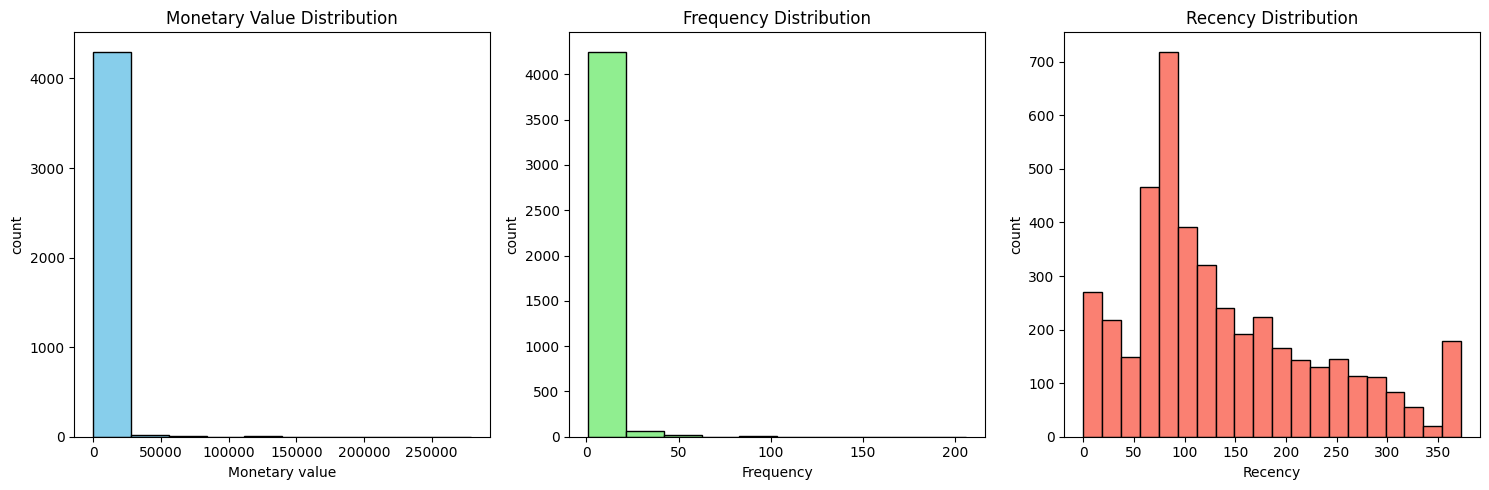

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=20, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()


from the above there  are some outliers 

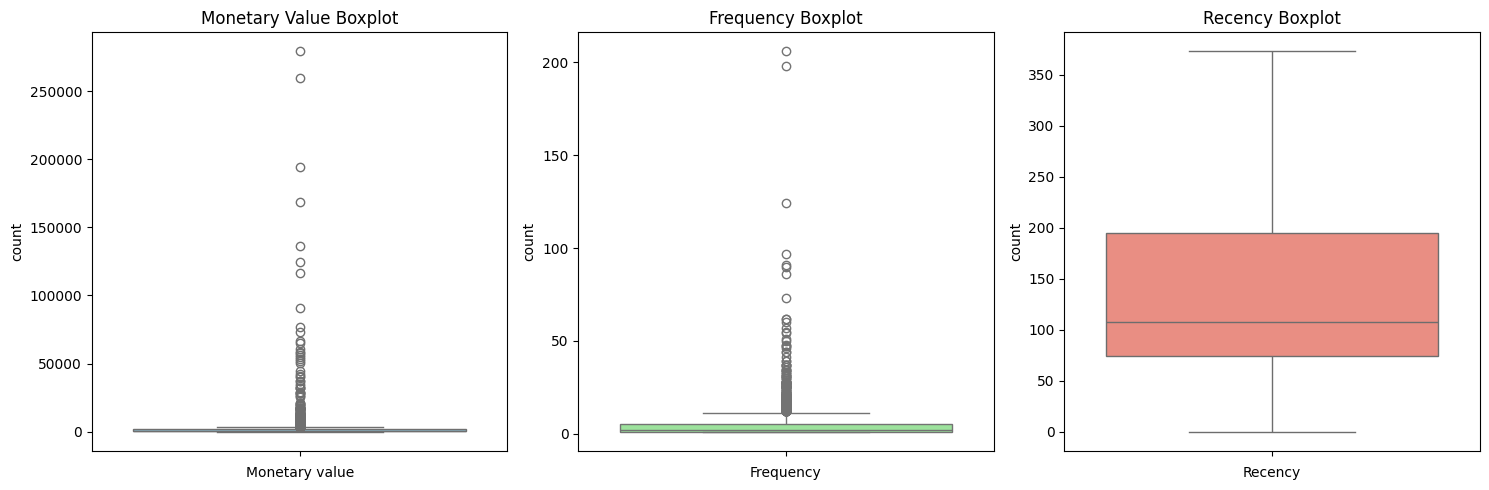

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(aggregated_df["Frequency"],color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(aggregated_df["Recency"],color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()

i didnt remove any outliers . i jest copy the outliers for seperate clustering

In [34]:
M_Q1=aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3=aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR=M_Q3 - M_Q1


monetary_outliers_df=aggregated_df[(aggregated_df["MonetaryValue"]>(M_Q3 + 1.5 * M_Q1)) | (aggregated_df["MonetaryValue"]<(M_Q1 - 1.5 * M_Q3))].copy()

monetary_outliers_df.describe()

CustomerID        MonetaryValue            Frequency  \
count               840.00               840.00               840.00   
mean              15075.59              7707.72                11.82   
std                1770.62             19196.79                14.62   
min               12346.00              2089.85                 1.00   
25%               13526.00              2660.21                 5.00   
50%               14933.00              3638.10                 8.00   
75%               16652.75              5900.26                13.00   
max               18272.00            279138.02               206.00   

                   Recency  
count               840.00  
mean                107.34  
std                  50.00  
min                   0.00  
25%                  79.00  
50%                  92.00  
75%                 120.00  
max                 372.00

In [35]:
F_Q1=aggregated_df["Frequency"].quantile(0.25)
F_Q3=aggregated_df["Frequency"].quantile(0.75)
F_IQR=F_Q3 - F_Q1


frequency_outliers_df=aggregated_df[(aggregated_df["Frequency"]>(F_Q3 + 1.5 * F_Q1)) | (aggregated_df["Frequency"]<(F_Q1 - 1.5 * F_Q3))].copy()

frequency_outliers_df.describe()

CustomerID        MonetaryValue            Frequency  \
count               692.00               692.00               692.00   
mean              15332.09              7766.88                14.35   
std                1735.01             19957.12                15.24   
min               12347.00               201.12                 7.00   
25%               13877.75              2296.07                 8.00   
50%               15299.50              3618.80                10.00   
75%               16886.00              6159.81                15.00   
max               18283.00            279138.02               206.00   

                   Recency  
count               692.00  
mean                 99.75  
std                  36.69  
min                   0.00  
25%                  78.00  
50%                  91.00  
75%                 106.00  
max                 372.00

In [36]:
R_Q1=aggregated_df["Recency"].quantile(0.25)
R_Q3=aggregated_df["Recency"].quantile(0.75)
R_IQR=R_Q3 - R_Q1


recency_outliers_df=aggregated_df[(aggregated_df["Recency"]>(R_Q3 + 1.5 * R_Q1)) | (aggregated_df["Recency"]<(R_Q1 - 1.5 * R_Q3))].copy()

recency_outliers_df.describe()

CustomerID        MonetaryValue            Frequency  \
count               311.00               311.00               311.00   
mean              15368.56               709.57                 1.62   
std                1790.39              4383.75                 2.06   
min               12346.00                35.40                 1.00   
25%               13803.50               175.95                 1.00   
50%               15350.00               309.80                 1.00   
75%               16904.50               536.69                 2.00   
max               18269.00             77183.60                34.00   

                   Recency  
count               311.00  
mean                347.69  
std                  23.36  
min                 307.00  
25%                 324.00  
50%                 359.00  
75%                 367.00  
max                 373.00

In [37]:
non_outliers_df=aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(recency_outliers_df.index))]
non_outliers_df.describe()

CustomerID        MonetaryValue            Frequency  \
count              3048.00              3048.00              3048.00   
mean              15338.37               636.81                 2.23   
std                1698.78               488.85                 1.40   
min               12348.00                 0.00                 1.00   
25%               13865.75               254.11                 1.00   
50%               15362.00               491.36                 2.00   
75%               16790.50               911.96                 3.00   
max               18287.00              2083.27                 6.00   

                   Recency  
count              3048.00  
mean                127.38  
std                  81.48  
min                   0.00  
25%                  70.00  
50%                 112.00  
75%                 189.00  
max                 305.00

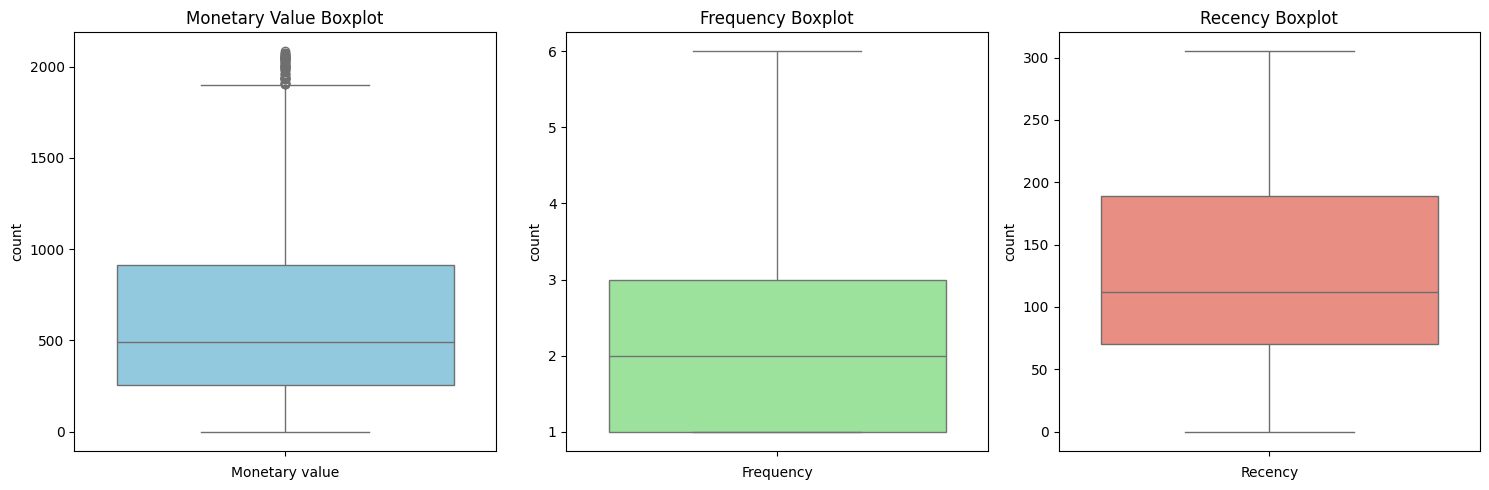

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"],color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"],color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()

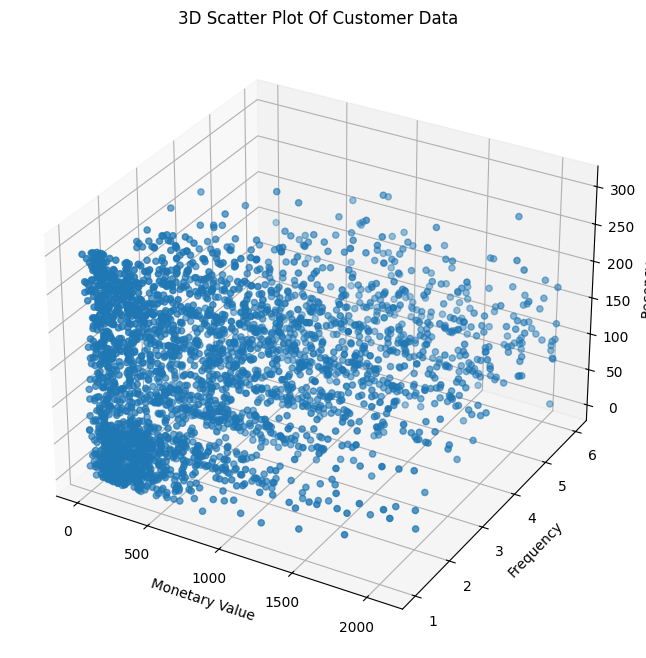

In [39]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data")

plt.show()

# StandardScaler

In [40]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])
scaled_data

array([[ 1.63762689,  1.27226182, -0.65526356],
       [ 1.67917982, -0.8785169 , -1.34263489],
       [-1.12078369, -0.8785169 ,  0.9281454 ],
       ...,
       [-1.13751943, -0.8785169 ,  0.64583218],
       [-0.93859323, -0.16159066, -0.02926467],
       [ 2.45608248,  0.55533558,  0.90359643]])

In [41]:
scaled_data_df=pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue","Frequency","Recency"))
scaled_data_df

MonetaryValue            Frequency              Recency
2                    1.64                 1.27                -0.66
3                    1.68                -0.88                -1.34
6                   -1.12                -0.88                 0.93
7                    0.91                -0.88                 1.27
8                   -0.36                -0.88                 1.05
...                   ...                  ...                  ...
4329                -0.95                -0.88                -0.67
4330                -0.93                -0.88                 1.84
4331                -1.14                -0.88                 0.65
4332                -0.94                -0.16                -0.03
4334                 2.46                 0.56                 0.90

[3048 rows x 3 columns]

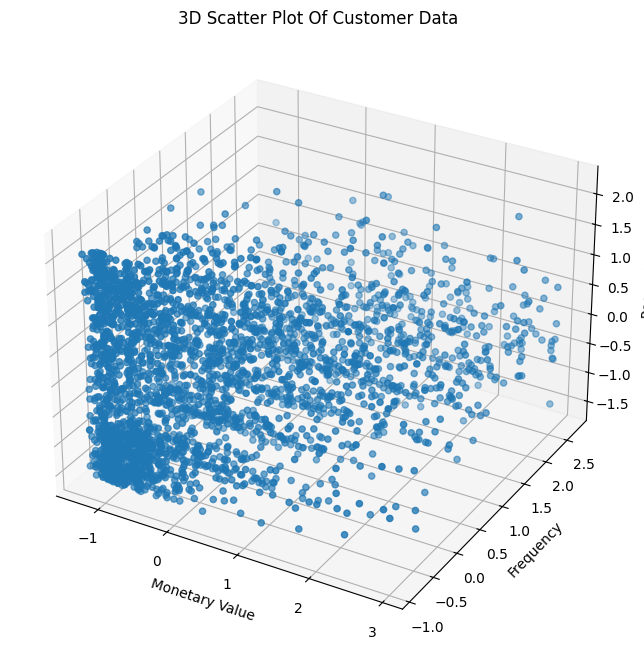

In [42]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data")

plt.show()

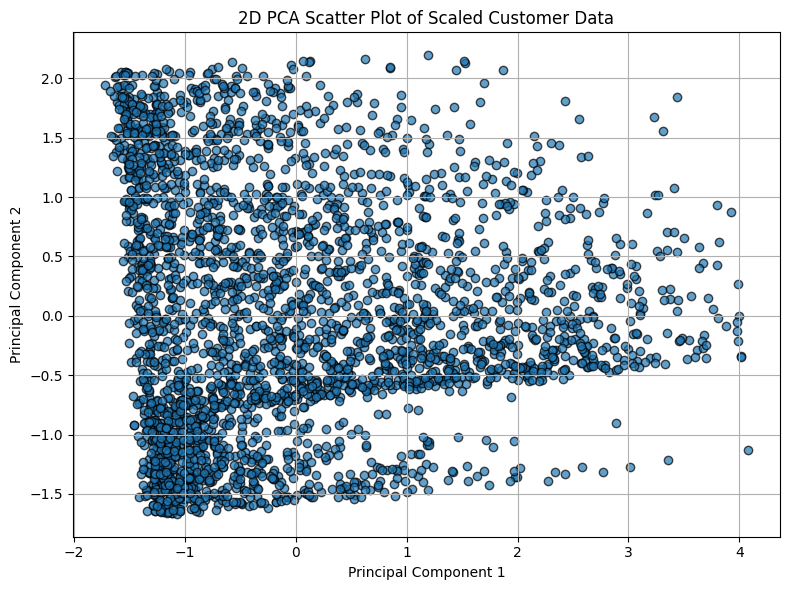

In [ ]:
# Extract scaled RFM features
rfm_scaled = scaled_data_df[["MonetaryValue", "Frequency", "Recency"]]

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

# Create a DataFrame for PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7, edgecolors='k')
plt.title("2D PCA Scatter Plot of Scaled Customer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# KMeans Clustering

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

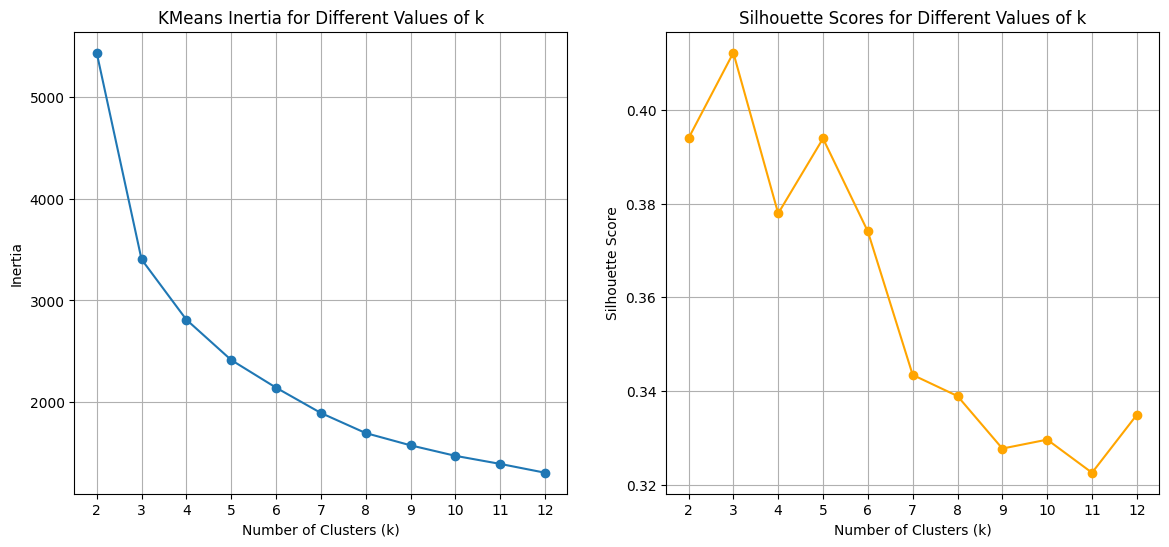

In [43]:


max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)

    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)

    # Store inertia
    inertia.append(kmeans.inertia_)

# Plot results
plt.figure(figsize=(14, 6))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

# Silhouette Score Plot (Fixed)
plt.subplot(1, 2, 2)
plt.plot(k_values,silhouette_scores, marker='o', color="orange")  # Fixed list name
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.show()

the best silhouette score is for k = 3, suggesting that 3 clusters might be the optimal choice for my data based on cohesion and separation.

| k   | Silhouette Score |
|-----|------------------|
| 2   | 0.394            |
| 3   | 0.412 (highest)  |
| 4   | 0.378            |
| 5   | 0.394            |
| 6   | 0.374            |
| 7   | 0.344            |
| 8   | 0.339            |
| 9   | 0.328            |
| 10  | 0.330            |
| 11  | 0.323            |
| 12  | 0.334            |


In [44]:
kmeans=KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 0, ..., 0, 2, 1])

### Create cluster column

In [45]:
non_outliers_df["cluster"]=cluster_labels
non_outliers_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9800\1037861237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["cluster"]=cluster_labels


CustomerID        MonetaryValue  Frequency     LastInvoiceDate  \
2                12348.00              1437.24          4 2011-09-25 13:13:00   
3                12349.00              1457.55          1 2011-11-21 09:51:00   
6                12353.00                89.00          1 2011-05-19 17:47:00   
7                12354.00              1079.40          1 2011-04-21 13:11:00   
8                12355.00               459.40          1 2011-05-09 13:49:00   
...                   ...                  ...        ...                 ...   
4329             18278.00               173.90          1 2011-09-27 11:58:00   
4330             18280.00               180.60          1 2011-03-07 09:52:00   
4331             18281.00                80.82          1 2011-06-12 10:53:00   
4332             18282.00               178.05          2 2011-08-05 13:35:00   
4334             18287.00              1837.28          3 2011-05-22 10:39:00   

      Recency  cluster  
2          74        1  
3          18        3  
6         203        0  
7         231        0  
8         213        0  
...       ...      ...  
4329       73        2  
4330      277        0  
4331      180        0  
4332      125        2  
4334      201        1  

[3048 rows x 6 columns]

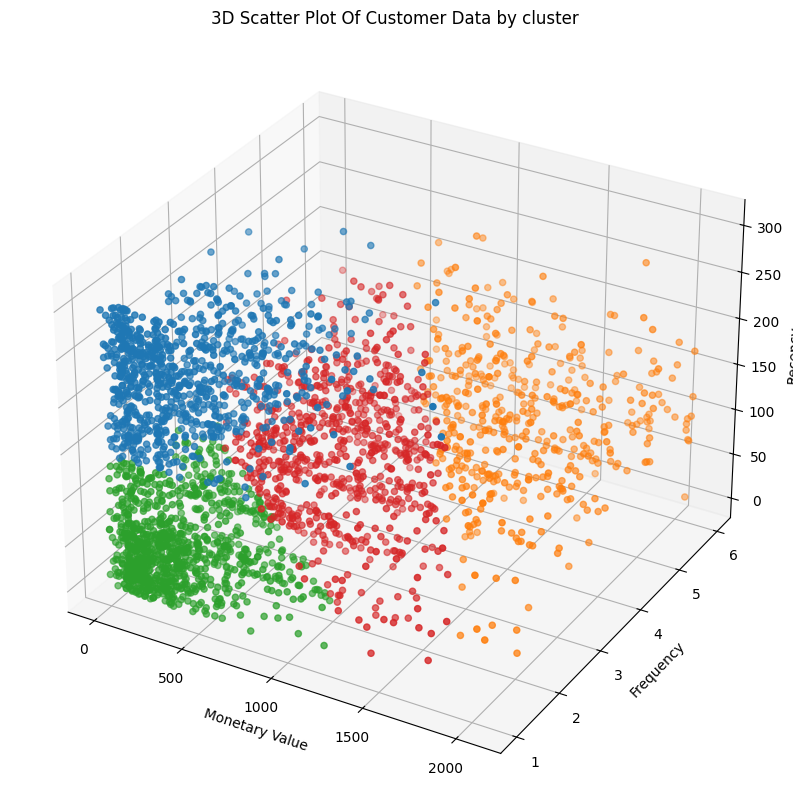

In [46]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green (Fixed)
    3: '#d62728'   # Red (Fixed)
}


colors=non_outliers_df["cluster"].map(cluster_colors)




fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetaryValue"], 
                   non_outliers_df["Frequency"], 
                   non_outliers_df["Recency"], 
                   c=colors,  # use mapped solid colors
                   marker="o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data by cluster")

plt.show()

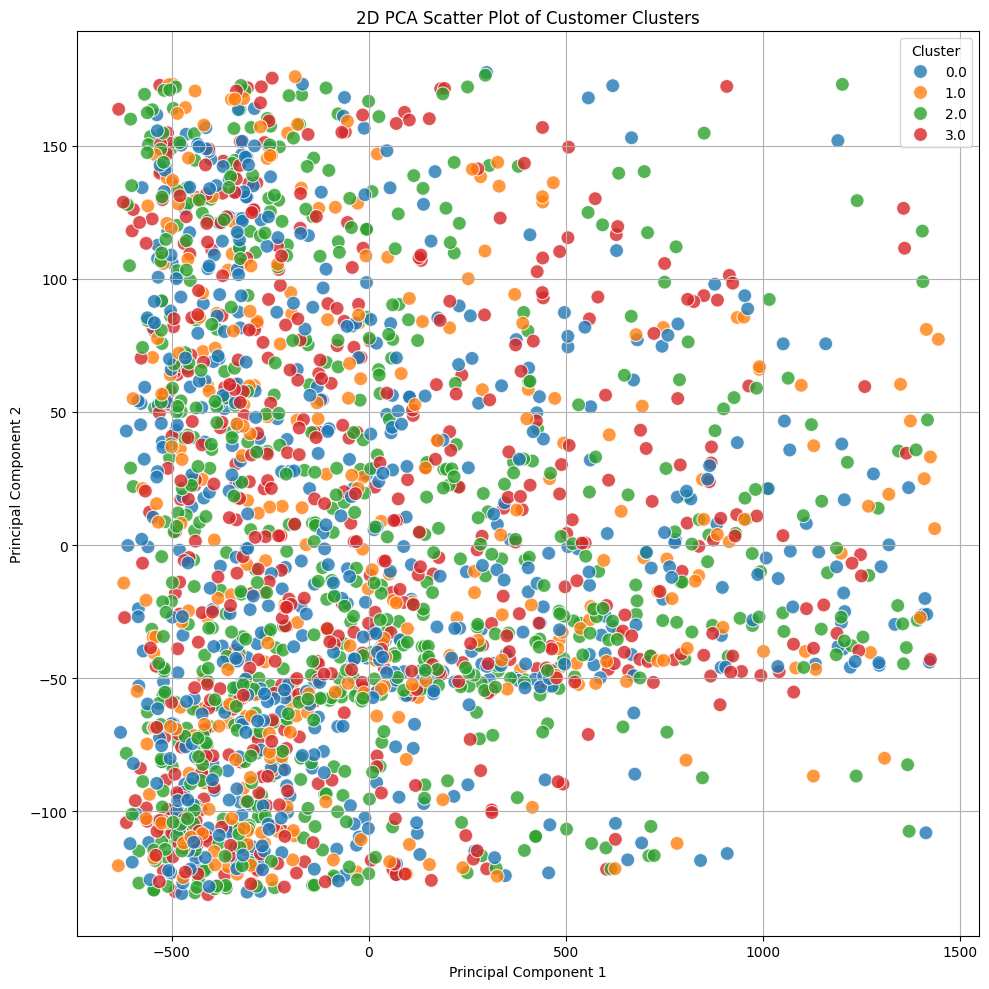

In [58]:

# Define cluster colors again for clarity
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'   # Red
}

# Extract RFM features
rfm_features = non_outliers_df[["MonetaryValue", "Frequency", "Recency"]]

# Run PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["cluster"] = non_outliers_df["cluster"]
pca_df["color"] = pca_df["cluster"].map(cluster_colors)

# Plot the 2D scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="cluster",
    palette=cluster_colors,
    data=pca_df,
    s=100,
    alpha=0.8
)
plt.title("2D PCA Scatter Plot of Customer Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9800\2355759196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["DBSCAN_Cluster"] = dbscan_labels


DBSCAN Cluster Counts:
 -1    3048
dtype: int64
Silhouette Score not applicable (only one cluster or contains noise).


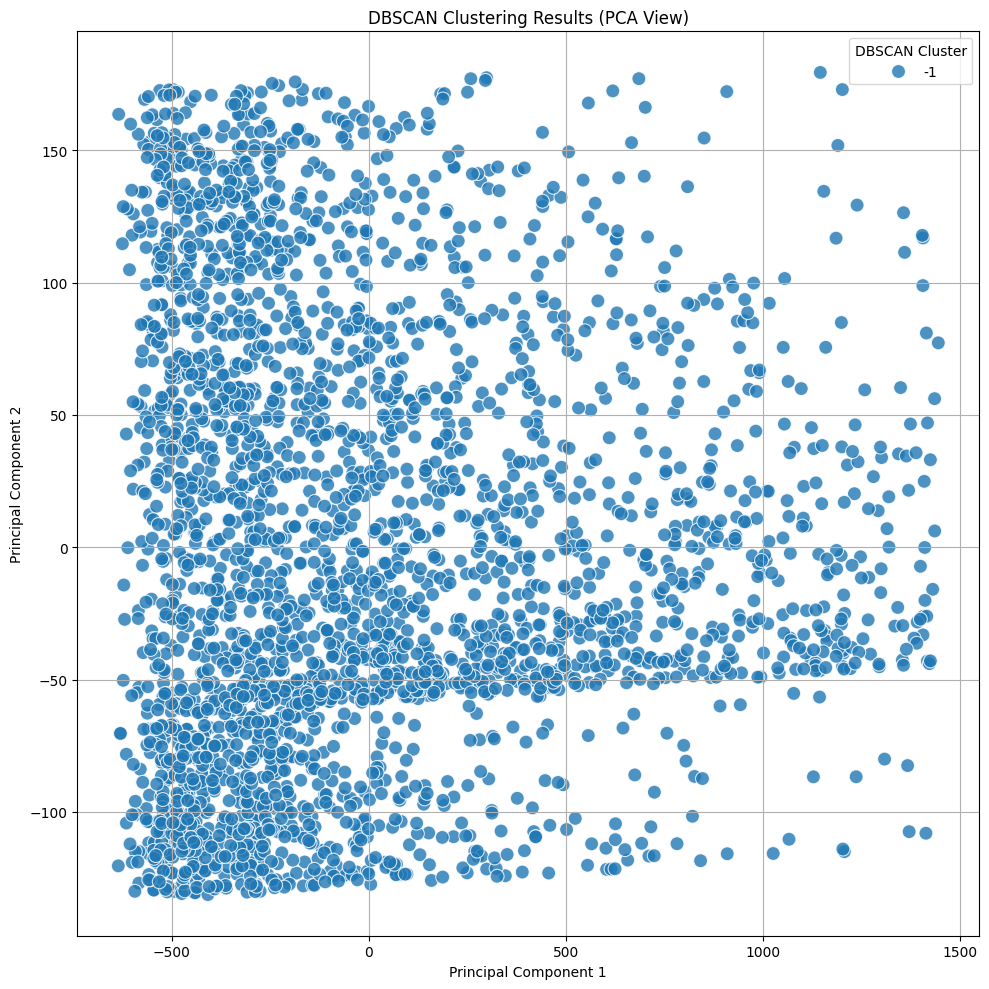

In [ ]:


# Run DBSCAN on scaled RFM features (use same as PCA input)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_features)

# Add DBSCAN cluster labels to your original DataFrame
non_outliers_df["DBSCAN_Cluster"] = dbscan_labels

# Show how many samples are in each DBSCAN cluster
print("DBSCAN Cluster Counts:\n", pd.Series(dbscan_labels).value_counts())

# Silhouette Score (only valid if there are multiple clusters and no noise)
if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_sil_score = silhouette_score(rfm_features, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_sil_score:.3f}")
else:
    print("Silhouette Score not applicable (only one cluster or contains noise).")

# Plotting DBSCAN clusters using the same PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=dbscan_labels,
    palette="tab10",
    s=100,
    alpha=0.8
)
plt.title("DBSCAN Clustering Results (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="DBSCAN Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


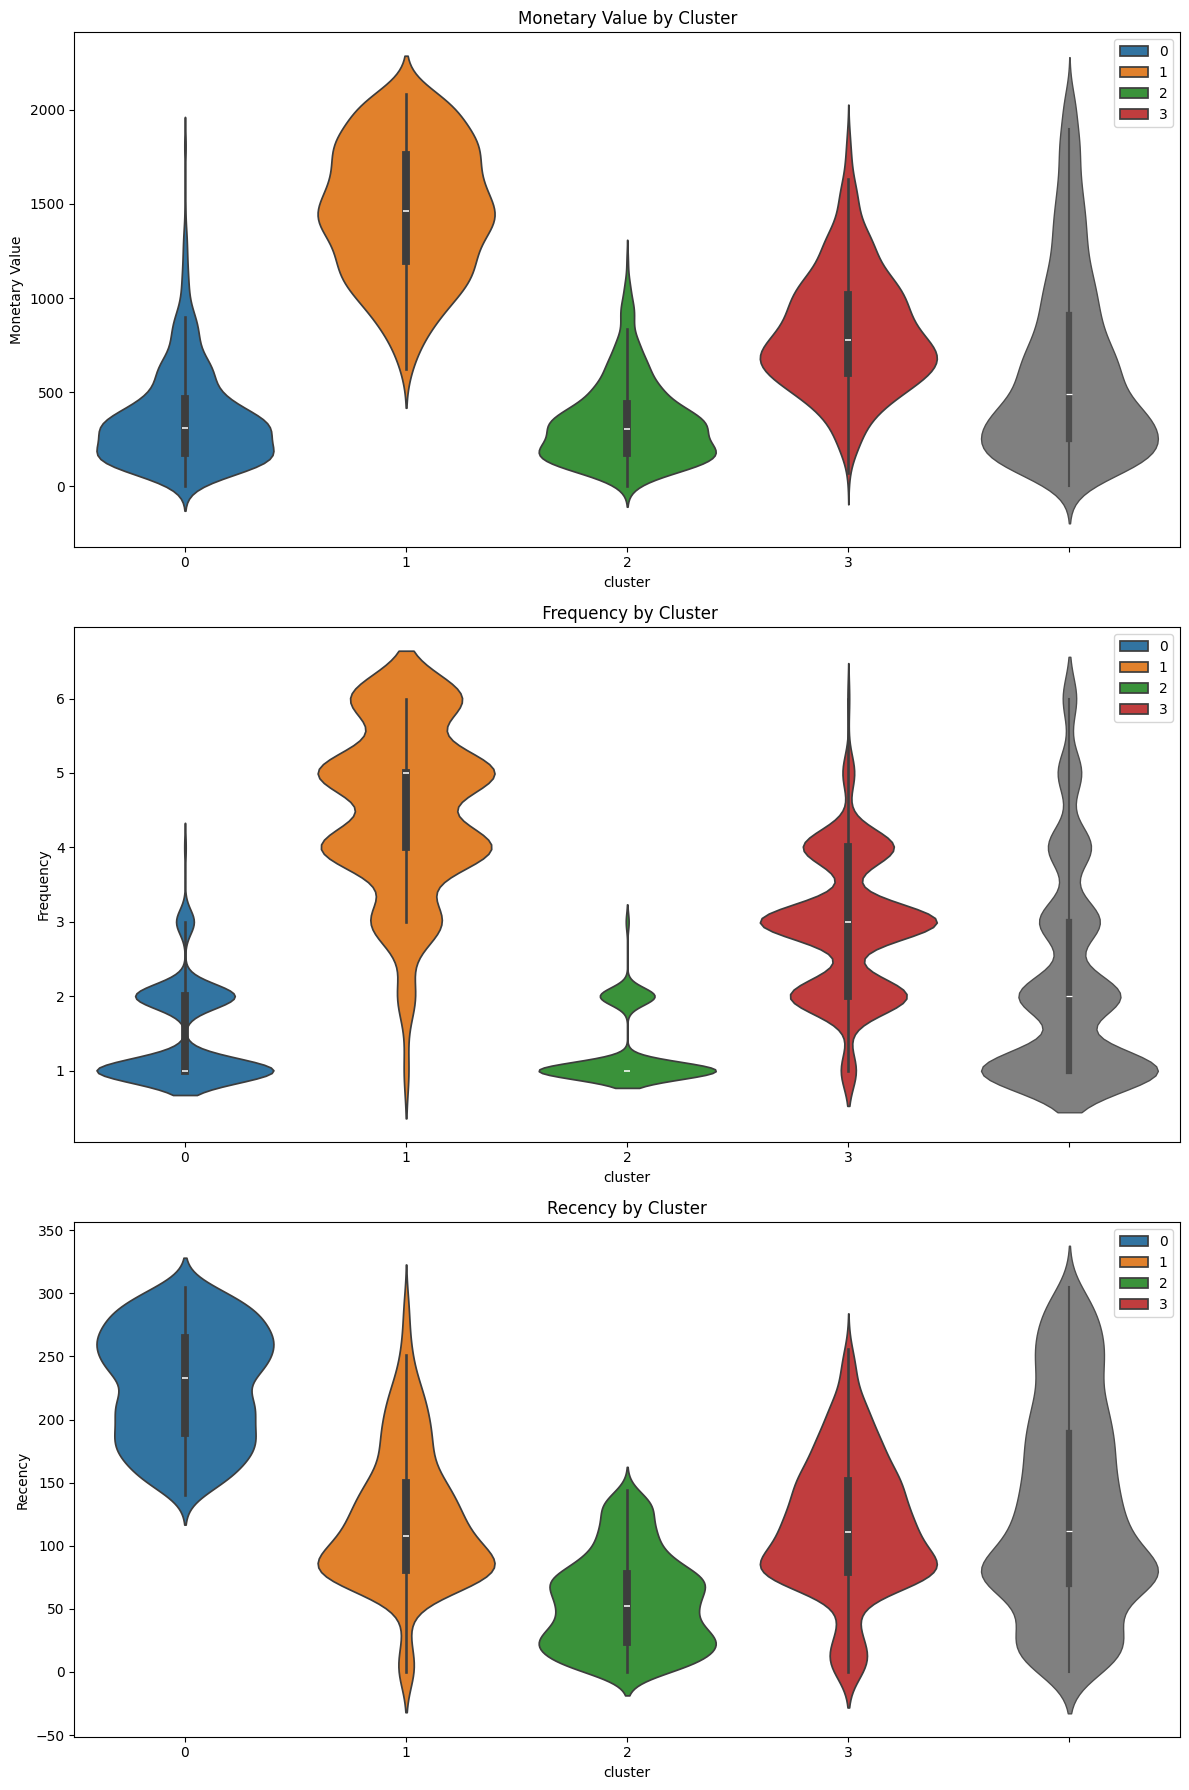

In [48]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["MonetaryValue"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["Frequency"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["Frequency"], color="gray", linewidth=1.0)
plt.title(" Frequency by Cluster")
plt.ylabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["Recency"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")


plt.tight_layout()
plt.show()

1. Cluster 0(Blue): "Retain"

     * Retionale: This Cluster Represents high-value customers who purchase regularly ,through not always very recently. the focus should be on retention efforts to maintain their loyality and spending levels.

     * Action: Implement loyality programs, personalized offers, and regular engagement to ensure they remain activity.

2. Cluster 1(Orange): "Re-Engage"

      * Retionale: this group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re engagement to bring them back into active purchasing behavior.
      * Action: Use targetted marketting campeigns, special discounts, or remainders to encorage them to return and purchase again.

3. cluster 2(Green): "Nurture"

      * Retionale: This clusters represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing  to increase their engagement and spending.
      * Action: Focus on building relationship, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. cluster 3(Red): "Reward"

      * Retionale: This cluster includes high-value, and very frequent buyers, many of whom are still actively purchasing. They are your most loyal Customers, and rewarding their loyality is key to maintaining their engagement.
      * Action: Implement a robust loyality program, provide exclusive offers, recognize their loyality to keep them engaged and satisfied

### Summery of Clusters:

* Cluster 0: "Retain"
* Cluster 1: "Re-Engage"
* Cluster 2: "Nurture"
* Cluster 3: "Reward"

In [49]:
overlap_indices= monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers=monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers=monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["cluster"]=-1
frequency_only_outliers["cluster"]=-2
monetary_and_frequency_outliers["cluster"]=-3


outlier_clusters_df=pd.concat([monetary_only_outliers, frequency_only_outliers,monetary_and_frequency_outliers])

outlier_clusters_df

CustomerID        MonetaryValue  Frequency     LastInvoiceDate  \
0                12346.00             77183.60          1 2011-01-18 10:01:00   
9                12356.00              2487.43          3 2011-04-08 12:33:00   
10               12357.00              6207.67          1 2011-11-06 16:07:00   
12               12359.00              6372.58          4 2011-06-03 12:26:00   
13               12360.00              2302.06          3 2011-08-19 10:10:00   
...                   ...                  ...        ...                 ...   
4291             18226.00              5228.05         11 2011-09-19 09:14:00   
4294             18229.00              7276.90         20 2011-09-07 10:51:00   
4295             18230.00              2810.20          7 2011-09-06 13:20:00   
4306             18245.00              2567.06          7 2011-07-13 14:29:00   
4314             18257.00              2337.63          8 2011-08-17 14:47:00   

      Recency  cluster  
0         325       -1  
9         244       -1  
10         32       -1  
12        188       -1  
13        112       -1  
...       ...      ...  
4291       81       -3  
4294       93       -3  
4295       93       -3  
4306      148       -3  
4314      113       -3  

[983 rows x 6 columns]

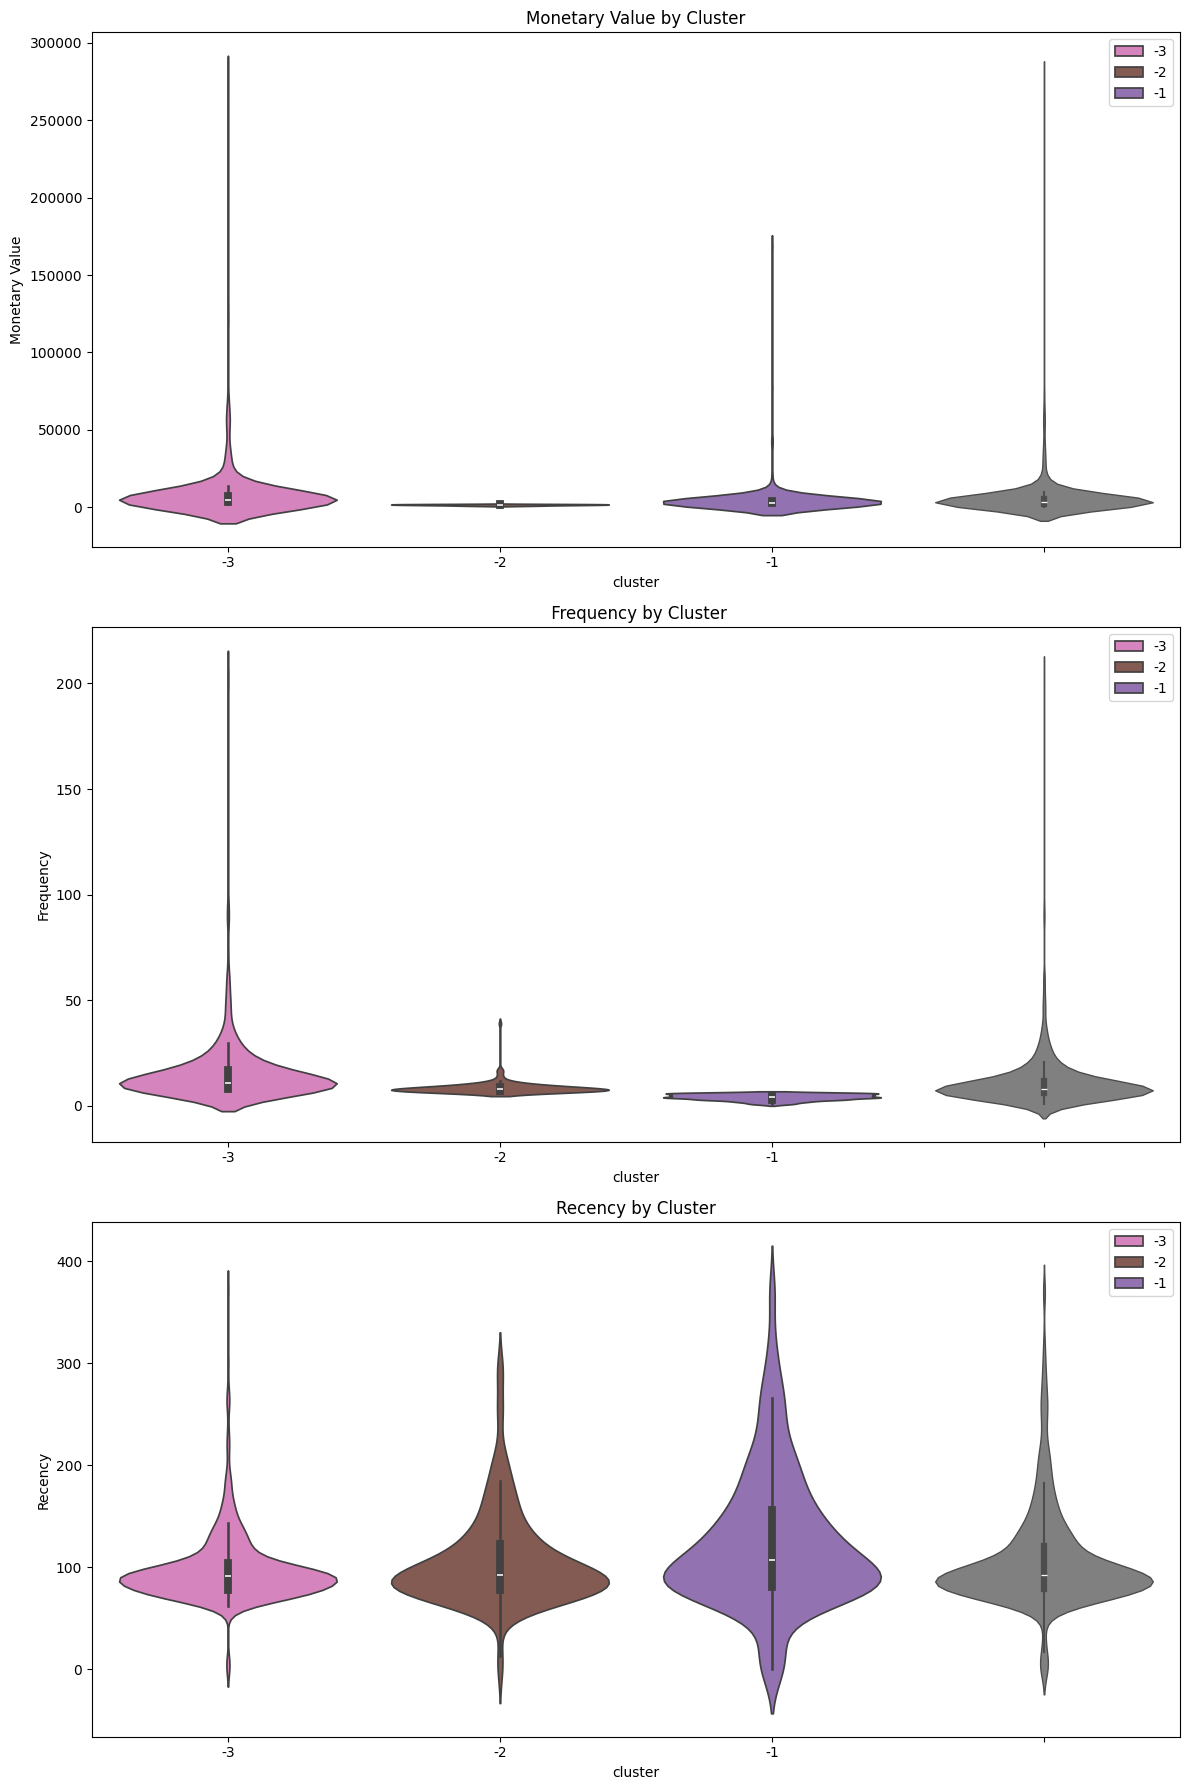

In [50]:
cluster_colors = {
    -1: '#9467bd',  
    -2: '#8c564b',  
    -3: '#e377c2'
}



plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["MonetaryValue"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["Frequency"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["Frequency"], color="gray", linewidth=1.0)
plt.title(" Frequency by Cluster")
plt.ylabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["Recency"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")


plt.tight_layout()
plt.show()

1. Cluster -1(Motetary Outliers): "PAMPER"

       * Charecteristics: High spenders but not necessarily frequent buyers. Their purchase are large but infrequent.
       * Potential Stretegy: Focus on maintaining their loyality with personalized offers or luxury service that cater to their high spending capacity.

2. Cluster -2(Frequency outliers): "UPSELL"

       * Charecteristics: Frequent buyers who spend less per purchase . These customers are consistenly engaged but might benefits from upselling oppertunities.
       * Potential Stretegy: Implemetn loyality programs or bundle deals to encorage higher spending per visit, given their frequent engagement.

3. Cluster -3(Monetary & Frequent Outliers): "DELIGHT"
       
       * Charecteristics: The most valuable outliers, with extreme spending and frequent purchase. they are likely you top-tier customers who require special attention.
       * Potential Stretegy: Develop VIP programs or exclusive offers to maintain their loyality and encourage continued engagement.


In [51]:
cluster_labels={
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

CONCADINATE both non-outliers clusters and outliers clusters

In [52]:
full_clustering_df=pd.concat([non_outliers_df,outlier_clusters_df])
full_clustering_df

CustomerID        MonetaryValue  Frequency     LastInvoiceDate  \
2                12348.00              1437.24          4 2011-09-25 13:13:00   
3                12349.00              1457.55          1 2011-11-21 09:51:00   
6                12353.00                89.00          1 2011-05-19 17:47:00   
7                12354.00              1079.40          1 2011-04-21 13:11:00   
8                12355.00               459.40          1 2011-05-09 13:49:00   
...                   ...                  ...        ...                 ...   
4291             18226.00              5228.05         11 2011-09-19 09:14:00   
4294             18229.00              7276.90         20 2011-09-07 10:51:00   
4295             18230.00              2810.20          7 2011-09-06 13:20:00   
4306             18245.00              2567.06          7 2011-07-13 14:29:00   
4314             18257.00              2337.63          8 2011-08-17 14:47:00   

      Recency  cluster  
2          74        1  
3          18        3  
6         203        0  
7         231        0  
8         213        0  
...       ...      ...  
4291       81       -3  
4294       93       -3  
4295       93       -3  
4306      148       -3  
4314      113       -3  

[4031 rows x 6 columns]

In [53]:
full_clustering_df["ClusterLabel"]=full_clustering_df["cluster"].map(cluster_labels)
full_clustering_df

CustomerID        MonetaryValue  Frequency     LastInvoiceDate  \
2                12348.00              1437.24          4 2011-09-25 13:13:00   
3                12349.00              1457.55          1 2011-11-21 09:51:00   
6                12353.00                89.00          1 2011-05-19 17:47:00   
7                12354.00              1079.40          1 2011-04-21 13:11:00   
8                12355.00               459.40          1 2011-05-09 13:49:00   
...                   ...                  ...        ...                 ...   
4291             18226.00              5228.05         11 2011-09-19 09:14:00   
4294             18229.00              7276.90         20 2011-09-07 10:51:00   
4295             18230.00              2810.20          7 2011-09-06 13:20:00   
4306             18245.00              2567.06          7 2011-07-13 14:29:00   
4314             18257.00              2337.63          8 2011-08-17 14:47:00   

      Recency  cluster ClusterLabel  
2          74        1    RE-ENGAGE  
3          18        3       REWARD  
6         203        0       RETAIN  
7         231        0       RETAIN  
8         213        0       RETAIN  
...       ...      ...          ...  
4291       81       -3      DELIGHT  
4294       93       -3      DELIGHT  
4295       93       -3      DELIGHT  
4306      148       -3      DELIGHT  
4314      113       -3      DELIGHT  

[4031 rows x 7 columns]

# Visualization

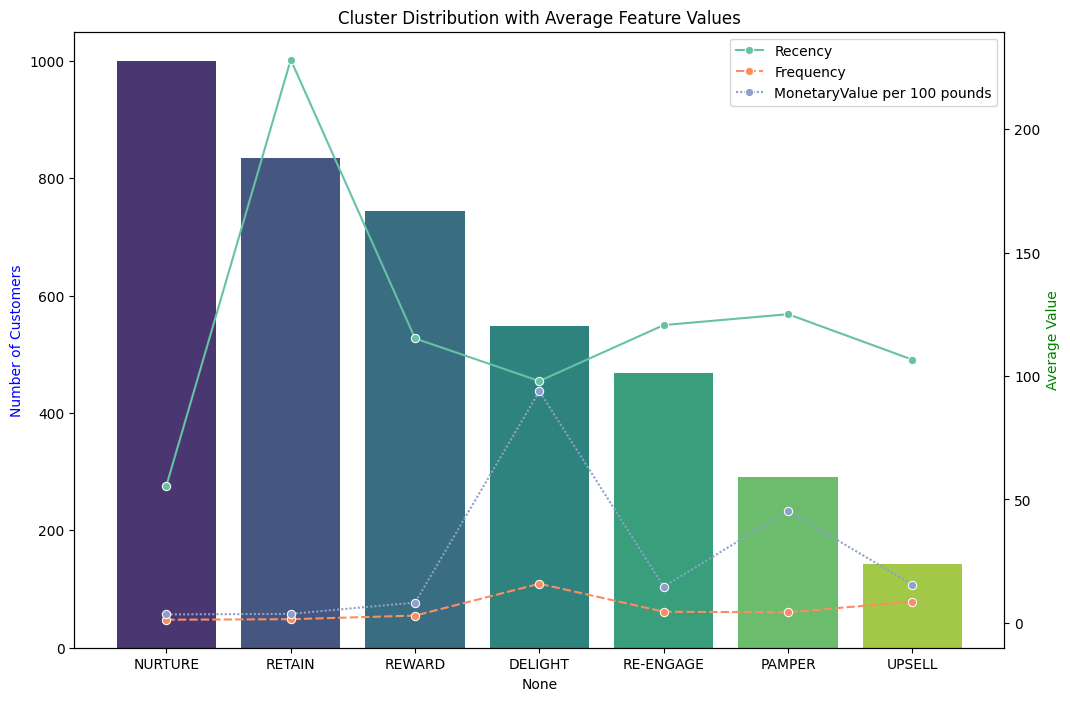

In [54]:
cluster_counts=full_clustering_df["ClusterLabel"].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"]=full_clustering_df["MonetaryValue"]/100.00
feature_means=full_clustering_df.groupby("ClusterLabel")[["Recency","Frequency","MonetaryValue per 100 pounds"]].mean()

fig,ax1=plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values, ax=ax1, palette="viridis",hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")


ax2=ax1.twinx()

sns.lineplot(data=feature_means,ax=ax2, palette="Set2", marker='o')
ax2.set_ylabel("Average Value", color='g')

plt.show()

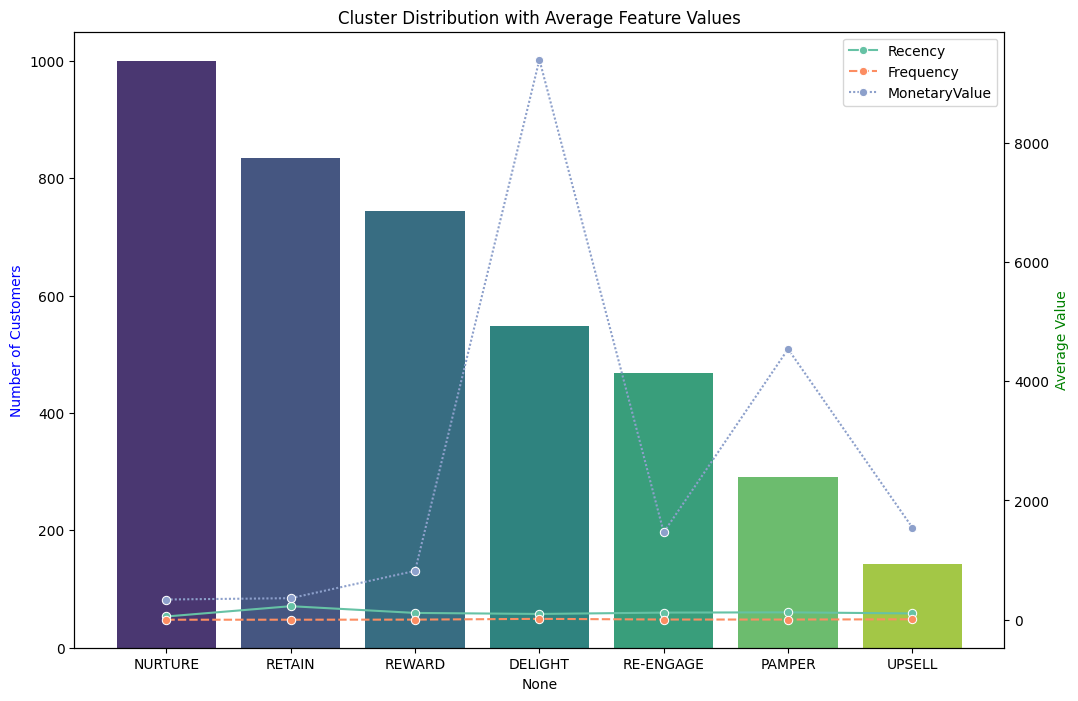

In [55]:
cluster_counts=full_clustering_df["ClusterLabel"].value_counts()

feature_means=full_clustering_df.groupby("ClusterLabel")[["Recency","Frequency","MonetaryValue"]].mean()

fig,ax1=plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values, ax=ax1, palette="viridis",hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")


ax2=ax1.twinx()

sns.lineplot(data=feature_means,ax=ax2, palette="Set2", marker='o')
ax2.set_ylabel("Average Value", color='g')

plt.show()